## Reducing memory for HITEMP CH4

In [1]:
from exojax.database import moldb 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')

First of all, set a wavenumber bin in the unit of wavenumber (cm-1).
Here we set the wavenumber range as $1000 \le \nu \le 10000$ (1/cm) with the resolution of 0.01 (1/cm). 

We call moldb instance with the path of par file.
If the par file does not exist, moldb will try to download it from HITRAN website.

In [2]:
# Setting wavenumber bins and loading HITEMP database
wav=np.linspace(16370.0,16390.0,2000,dtype=np.float64) #AA
nus=1.e8/wav[::-1] #cm-1

 when initializing MdbHit, extract=True option does extract  the opacity in the wavenumber range we now considered. It reduces the use of DRAM. (If you have very large DRAM, not necessarily)

In [3]:
mdbCH4=moldb.MdbHit('~/exojax/data/CH4/06_HITEMP2020.par.bz2',nus,extract=True)

Extract HITEMP: 31880412it [01:47, 296364.94it/s]


self.path changed: ~/exojax/data/CH4/6101.281269066504_6108.7354917532075_1.0/06_HITEMP2020.par
HAPI initializes all the par files in  ~/exojax/data/CH4/6101.281269066504_6108.7354917532075_1.0
HAPI detected: 06_HITEMP2020.header
HAPI detected: 06_HITEMP2020.par


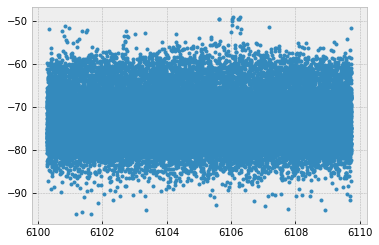

In [4]:
plt.plot(mdbCH4.nu_lines,mdbCH4.logsij0,".")
plt.show()